In [339]:
# 1. Importing the required libraries for EDA
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multinomial

### EDA

In [340]:
# 2. Loading the data into the DataFrame
df = pd.read_csv("../data/data_for_EDA.csv", index_col=0)
# Display the top 5 rows 
df.head()

,name,distance,rating,price
0,Coffee & Whisky House,603,8.8,3.0
1,Coffee & Whisky House,832,8.8,3.0
2,Coffee & Whisky House,603,8.8,3.0
3,Coffee & Whisky House,229,8.8,3.0
4,Coffee & Whisky House,229,8.8,3.0


In [341]:
# 3. Checking the types of data
df.dtypes

name         object
distance      int64
rating      float64
price       float64
dtype: object

In [342]:
df.describe()

,distance,rating,price
count,1211.000000,773.000000,769.000000
mean,550.245252,5.584347,1.596879
std,647.024987,1.943763,0.711725
min,6.000000,1.000000,1.000000
25%,277.000000,4.000000,1.000000
50%,513.000000,5.000000,1.000000
75%,750.000000,7.400000,2.000000
max,14936.000000,8.800000,4.000000


In [343]:
# 4. Dropping irrelevant columns
df = df.drop(['name'], axis=1)
df.head()

,distance,rating,price
0,603,8.8,3.0
1,832,8.8,3.0
2,603,8.8,3.0
3,229,8.8,3.0
4,229,8.8,3.0


In [344]:
# 5. Renaming the columns
# df = df.rename(columns={"Column_Name": "New_Name"})
# df.head()

In [345]:
# 6. Dropping the duplicate rows
print(f'DataFrame before dropping duplicates {df.shape}')
duplicates_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicates_df.shape)
# Count the number of rows
print('Count of rows:\n', df.count())
df = df.drop_duplicates()
df.head()

DataFrame before dropping duplicates (1211, 3)
Number of duplicate rows: (510, 3)
Count of rows:
 distance    1211
rating       773
price        769
dtype: int64


,distance,rating,price
0,603,8.8,3.0
1,832,8.8,3.0
3,229,8.8,3.0
6,852,8.8,3.0
7,211,8.8,3.0


In [346]:
print('Count of rows:\n', df.count())

Count of rows:
 distance    701
rating      408
price       422
dtype: int64


In [347]:
# 7. Dropping the missing or null values
print('Count of rows:\n', df.count())

Count of rows:
 distance    701
rating      408
price       422
dtype: int64


In [348]:
# Dropping the missing values.
df = df.dropna()
print(df.count())
# After dropping the values
print('Count of nulls:\n', df.isnull().sum())

distance    252
rating      252
price       252
dtype: int64
Count of nulls:
 distance    0
rating      0
price       0
dtype: int64


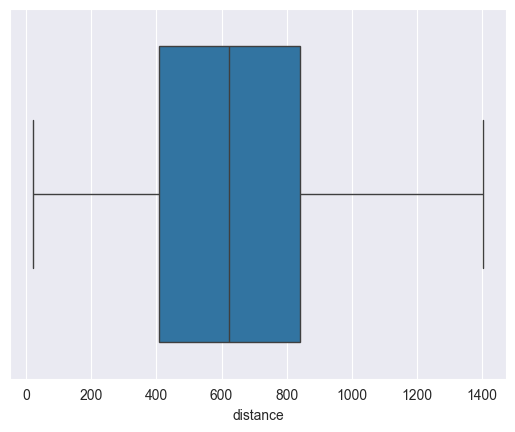

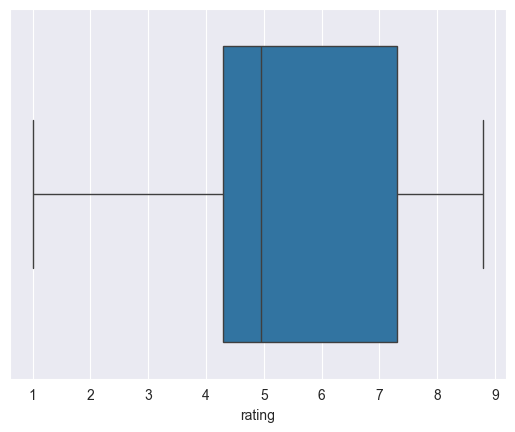

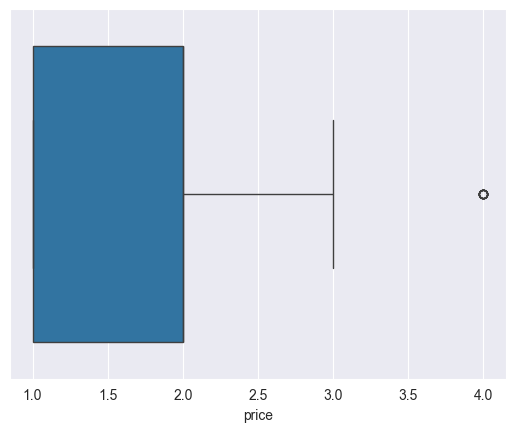

In [349]:
# 8. Detecting Outliers
sns.boxplot(x=df['distance'])
plt.show()
sns.boxplot(x=df['rating'])
plt.show()
sns.boxplot(x=df['price'])
plt.show()

In [350]:
# Standard Deviation
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('IQR:\n', IQR)

IQR:
 distance    434.75
rating        3.00
price         1.00
dtype: float64


In [351]:
# Remove outliers 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'DataFrame after dropping outliers {df.shape}')

DataFrame after dropping outliers (243, 3)


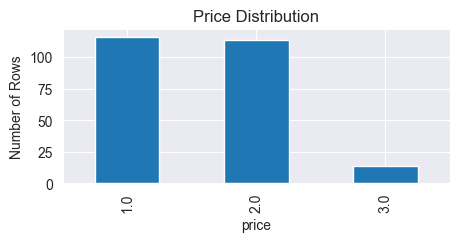

In [352]:
# 9. Plot different features against one another (scatter), 
# against frequency (histogram)
df['price'].value_counts().plot(kind='bar', figsize=(5, 2))
plt.title("Price Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('price');

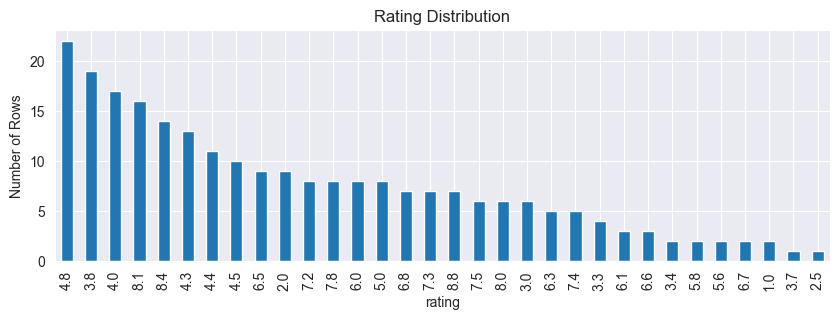

In [353]:
df['rating'].value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("Rating Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('rating');

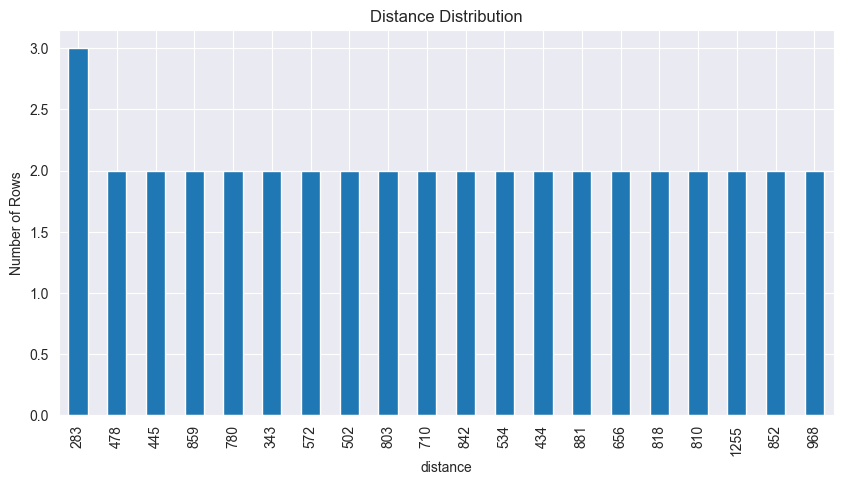

In [354]:
df['distance'].value_counts().nlargest(20).plot(kind='bar', figsize=(10, 5))
plt.title("Distance Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('distance');

          distance    rating     price
distance  1.000000 -0.102804  0.086163
rating   -0.102804  1.000000 -0.040950
price     0.086163 -0.040950  1.000000


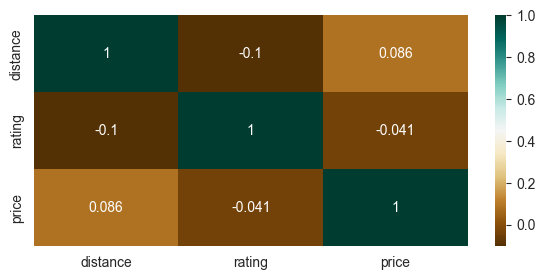

In [355]:
# Heat Maps
plt.figure(figsize=(7, 3))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
print(c)


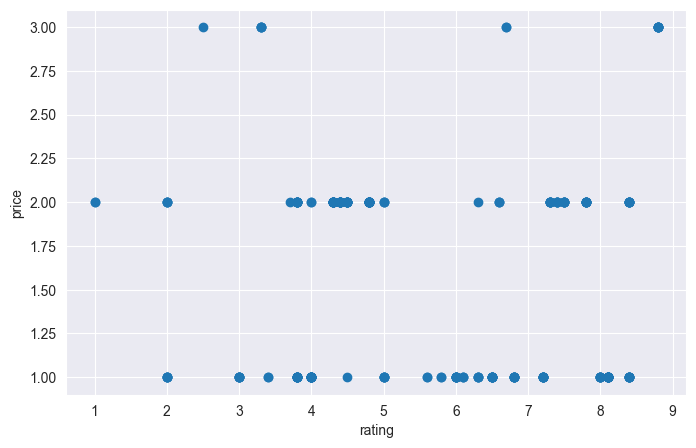

In [356]:
# Scatterplot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df['rating'], df['price'])
ax.set_xlabel('rating')
ax.set_ylabel('price')
plt.show()

### Build a regression model.

In [357]:
# Example: Adding a constant column for regression analysis
df = sm.add_constant(df)
# Display the first few rows
# pri nt(dat.head())

Provide model output and an interpretation of the results. 

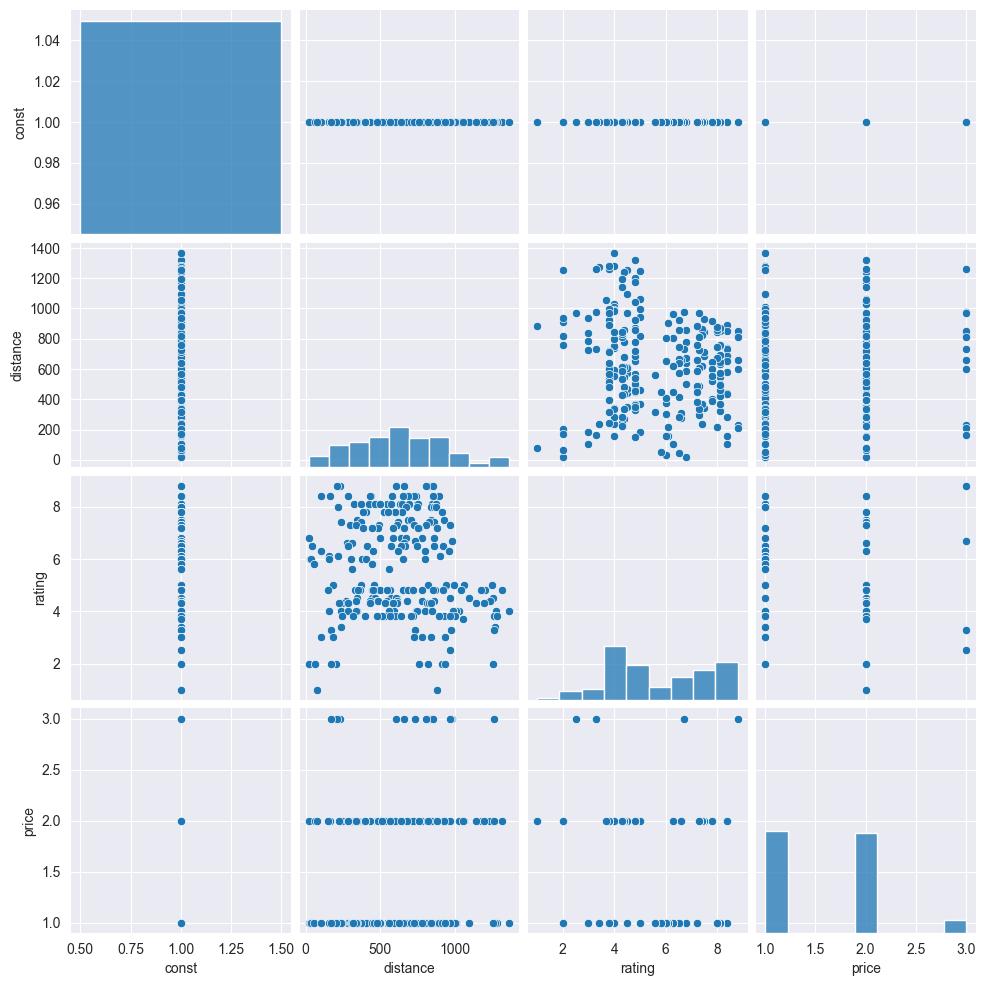

In [358]:
sns.pairplot(data=df)
plt.show()

In [359]:
df.corr(numeric_only=True)

,const,distance,rating,price
const,NaN,NaN,NaN,NaN
distance,NaN,1.000000,-0.102804,0.086163
rating,NaN,-0.102804,1.000000,-0.040950
price,NaN,0.086163,-0.040950,1.000000


In [360]:
import scipy

stat, p1 = scipy.stats.pearsonr(df['price'], df['rating'])
stat, p2 = scipy.stats.pearsonr(df['price'], df['distance'])
stat, p3 = scipy.stats.pearsonr(df['rating'], df['distance'])
print(p1, p2, p3)

0.5252223013429221 0.18066477850926121 0.10992662098531866


In [361]:
# Add a constant for the intercept
X = df[['price', 'rating', 'distance']]
X = sm.add_constant(X)  # Adds the intercept term
y = df['distance']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.541e+30
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:34:56   Log-Likelihood:                 6404.0
No. Observations:                 243   AIC:                        -1.280e+04
Df Residuals:                     239   BIC:                        -1.279e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.837e-13   2.64e-13     -1.452      0.1

# Stretch

### How can you turn the regression model into a classification model?

#### To transform the regression problem into a classification problem, we change the nature of the dependent variable. Instead of predicting a continuous value (number of bikes), we classify the locations into discrete categories (e.g., low, medium, or high bike availability).

In [362]:
df['price_range'] = pd.cut(
    df['price'],
    bins=[0, 1, 2, float('inf')],
    labels=['Low', 'Medium', 'High']
)
df

,const,distance,rating,price,price_range
0,1.0,603,8.8,3.0,High
1,1.0,832,8.8,3.0,High
3,1.0,229,8.8,3.0,High
6,1.0,852,8.8,3.0,High
7,1.0,211,8.8,3.0,High
...,...,...,...,...,...
1196,1.0,63,2.0,2.0,Medium
1197,1.0,937,2.0,1.0,Low
1198,1.0,761,2.0,2.0,Medium
1199,1.0,881,1.0,2.0,Medium


In [367]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and target
X = df[['price', 'rating', 'distance']]
y = df['price_range'].cat.codes  # Convert categories to numeric codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00         3

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

